In [1]:
import pandas as pd
import numpy as np

from toggle_code import toggle_code as hide_code
from toggle_code import run_code as run_code

from modelBuilder import importData
dataframe, pairs = importData()

from modelBuilder import distributionBuilder
distributions = distributionBuilder(dataframe)

from modelBuilder import difficulty
questionDifficulty = difficulty(dataframe)

from modelBuilder import startingQ
problemNum, problem, answer = startingQ(dataframe, pairs)

from student import Student
student = Student(problemNum, problem, answer)

C:\Users\C22Evan.Marrone\Anaconda3\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\C22Evan.Marrone\Anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


# Team introduction
Cameron Cubra, Cameron Estep, Jacob Hall, Tom Kyle, Evan Marrone


# Topic Overview
- Problem Statement
- Why?
- What we have accomplished
- What worked well
- Difficulties
- Way forward

# Problem Statement

Develop a universal tutoring algorithm for accelerated student learning. Given a set of training questions, the tutor should infer a student’s understanding of underlying concepts based on their past performance on previous questions and choose the next training question which will optimize the student’s progression toward proficiency. The system should be validated using simulated or real human subjects on any general topic/task with improvement over random question selection and/or other heuristics. The system prototype can be in the form of a command line program or include a simple GUI.

# Why?
To meet the goals in accordance with Design Interactive's vision of creating a Universal Automated Tutor.


# Tutor Description
Step 1: Generate high end and low end thresholds for each specific problem in the problem set. The low end is the mean of the data after the top 10% is removed minus one quarter the standard deviation, and the high end is the mean of the data after the top 10% is removed plus one half the standard deviation.

Step 2: The tutor presents the student with a question.

Step 3: Compare the student's responses with the problem's distribution threshold values. The potential outcomes of this comparrison are listed below:

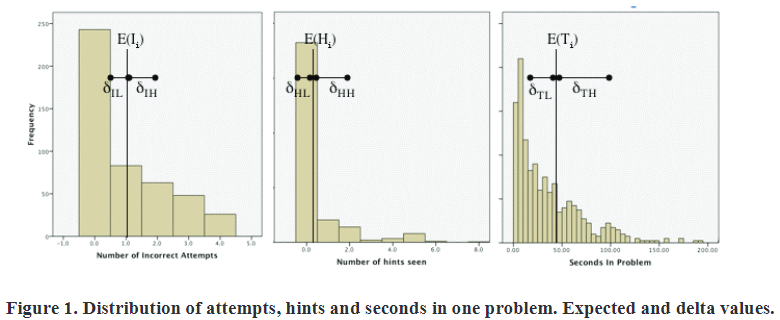

A table with all the possible comparisons of student expected values and problem low and high end thresholds are below:
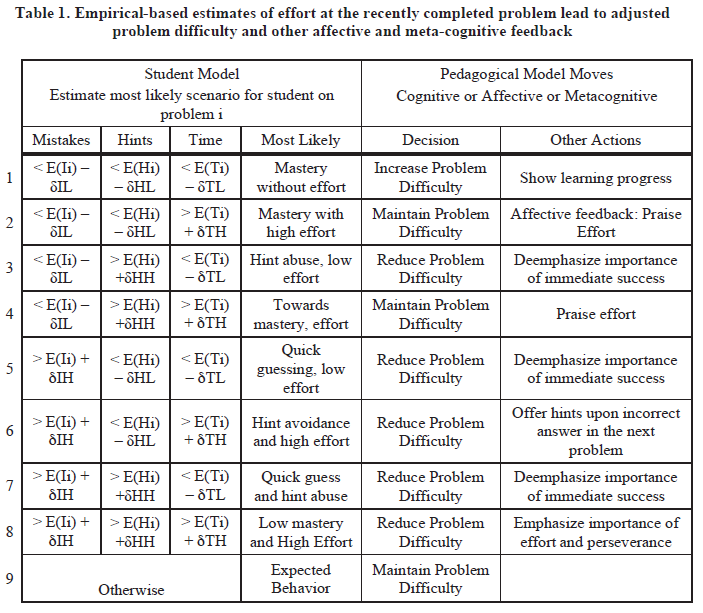

Step 4: Our tutor makes a decision based on the row in which our comparrison falls. For example, if the comparrison falls in row 1, then the tuor calls the increase problem difficulty function. This function then selects a question of greater difficulty based on the student's perceived difficulty model.

Step 5: The student attempts this next problem, and the tutor repeats this process until completion.

# The Data
Below we read in our data and question/answer pairs from our CSV data file.

In [2]:
dataframe.head()

,stud_id,duration,problem_id,step,attempt_num,last_attempt,outcome,input,hint,correct,incorrect
0,Stu_0012ae7d5d1993619f0bad91630b7c79,576.0,13603,"Step0:8788:Lines m and n are parallel, what is...",1.0,1.0,HINT,NaN,1,0,0
1,Stu_0012ae7d5d1993619f0bad91630b7c79,75.0,13603,Step1:8792:What is the measure of angle 2? SYSTEM,1.0,0.0,HINT,NaN,1,0,0
2,Stu_0012ae7d5d1993619f0bad91630b7c79,37.0,13603,Step1:8792:What is the measure of angle 2? SYSTEM,2.0,1.0,INCORRECT,55,0,0,1
3,Stu_0012ae7d5d1993619f0bad91630b7c79,166.0,13450,Step0:8635:Jacqueline is a runner who hopes to...,1.0,1.0,CORRECT,9 miles,0,1,0
4,Stu_00176143fc2991346939888160a9b1ce,14.0,12489,Step0:7674:Lee correctly answered 26 out of 51...,1.0,1.0,HINT,NaN,1,0,0


# Distributions

Here we build the distributions that we discussed in section 0. Below are examples of the question data being fought by different distributions.

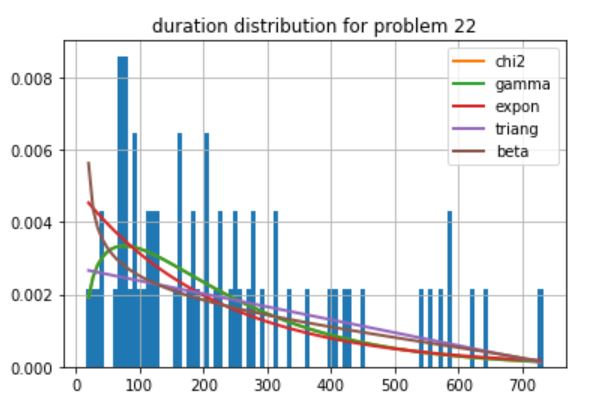

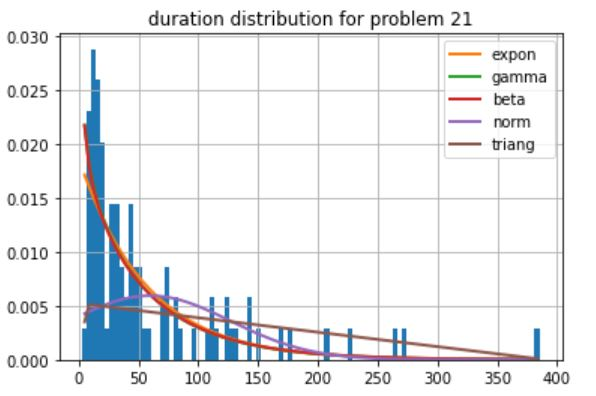

In [3]:
distributions.head()

,durationLower,hintLower,incorrectLower,durationUpper,hintUpper,incorrectUpper
problem_id,,,,,,
7,266.446968,4.718327,1.997720,522.125296,8.794116,4.312253
12,98.950352,1.373719,1.300298,253.682629,5.835896,3.399405
21,42.653503,0.101037,0.605915,93.110577,0.786937,1.557401
22,188.791350,1.545082,1.131963,321.094223,3.740606,2.951458
26,86.887437,0.742887,0.515258,188.347077,3.050812,1.530460


# Student Perceived Difficulty

Next we created a Student Perceived Difficulty for each question. We determined each question's difficulty by equally weighting three factors: average question duration, average number of incorrect answers, and average number of hints taken.

In [4]:
questionDifficulty

,problem_id,difficulty
0,234,0.000000
1,13187,0.000714
2,7340,0.000714
3,7307,0.001428
4,7285,0.001428
...,...,...
1296,10175,0.561957
1297,13225,0.587043
1298,3698,0.599521
1299,3684,0.888131


# Implementing the GUI

First we start with a random question. This question may have any difficulty, and thus the student's results on this question will determine if we need to reduce difficulty, increase difficulty, or maintain difficulty.

Each student will have an student instance where their current problem and answer are stored.

In [5]:
student.problem

'Coplanar lines AB, CD, and EF intersect at point G shown in the figure above. * The measure of angle EGB is 75?'

In [6]:
student.answer

'45'

This is where we implement the GUI

In [ ]:
import sys
import time
from time import sleep

import pandas as pd
from PyQt6.uic import loadUi
from PyQt6.QtWidgets import QDialog, QApplication
from PyQt6 import QtWidgets
import model
import modelBuilder as mb

from student import Student
import fuzzywuzzy
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

QScreen = "../View/QuestionScreen.ui"
CScreen = "../View/CorrectScreen_2.ui"
IScreen = "../View/IncorrectScreen_2.ui"

# QuestionScreen Class
# Functions: gotoresult, showhint
def attempttime(initialtime, endtime, answer):
    # Sets qtime to amount of seconds between attempts
    qtime = '%.2f' % (endtime - initialtime)
    qtimedouble = float(endtime - initialtime)

    # Truncated to hundredths
    print("Seconds between attempts:")
    print(qtime)
    print("Answer:")
    print(answer)
    return qtimedouble


class QuestionScreen(QDialog):
    data = {"duration": [], "hint": [], "incorrect": [], "correct": []}
    
    def __init__(self, start):
        print("QuestionScreen Start: " + str(start))
        self.start = start
        if self.start:
            self.data = {"duration": [], "hint": [], "incorrect": [], "correct": []}
            self.start = False
        # initialize time
        self.initialtime = time.time()
        self.problem = student.problem
        self.answer = student.answer
        super(QuestionScreen, self).__init__()
        loadUi(QScreen, self)
        self.QuestionLabel.setText(self.problem)
        self.submit.clicked.connect(self.gotoresult)
        self.hintButton.clicked.connect(self.showhint)


    def gotoresult(self):
        questionanswer = self.answer
        useranswer = self.answerBox.text()

        # Detect keystroke and remove empty ans text

        if useranswer == "":
            sleep(.1)
            self.emptyans.setText("Please enter an answer")
        correctness = False
        try:
            useranswernum = float(useranswer)
            error = abs(float(self.answer) - useranswernum) / abs(float(self.answer))
            if error < 0.005:
                correctness = True
        except:
            ratio = fuzz.token_sort_ratio(self.answer.lower().strip(), useranswer.lower().strip())
            if ratio > 75:
                correctness = True
        if correctness:
            sleep(.1)
            correct = CorrectScreen(self.initialtime, self.data)

            widget.addWidget(correct)
            widget.setCurrentIndex(widget.currentIndex() + 1)
        else:
            sleep(.1)
            wrong = WrongScreen(self.initialtime, self.answer, self.data)
            widget.addWidget(wrong)
            widget.setCurrentIndex(widget.currentIndex() + 1)


    def showhint(self):
        sleep(.1)
        hinttext = "Here is the hint for this question!"

        self.endtime = time.time()
        self.data["duration"].append(attempttime(self.initialtime, self.endtime, self.answer))
        self.data["hint"].append(1)
        self.data["incorrect"].append(0)
        self.data["correct"].append(0)
        self.initialtime = time.time()
        self.hintLabel.setText(hinttext)

    def showQuestion(self, question):
        sleep(.1)
        questiontext = question


class WrongScreen(QDialog):
    def __init__(self, initialtime, answer, data):
        self.initialtime = initialtime
        self.answer = answer
        self.endtime = time.time()
        self.data = data
        super(WrongScreen, self).__init__()
        loadUi(IScreen, self)
        self.submit.clicked.connect(self.returntoquestion)


    def returntoquestion(self):
        sleep(.1)
        self.data["duration"].append(attempttime(self.initialtime, self.endtime, self.answer))
        self.data["hint"].append(0)
        self.data["incorrect"].append(1)
        self.data["correct"].append(0)
        question = QuestionScreen(False)
        widget.addWidget(question)
        widget.setCurrentIndex(widget.currentIndex() + 1)


class CorrectScreen(QDialog):
    def __init__(self, initialtime, data):
        self.data = data
        self.initialtime = initialtime
        self.endtime = time.time()
        super(CorrectScreen, self).__init__()
        loadUi(CScreen, self)
        self.submit.clicked.connect(self.returntoquestion)

    def returntoquestion(self):
        sleep(.1)
        self.data["duration"].append(attempttime(self.initialtime,self.endtime, "Nice Work"))
        self.data["hint"].append(0)
        self.data["incorrect"].append(0)
        self.data["correct"].append(1)
        self.data = pd.DataFrame(self.data)
        self.data = self.data.sum()
        print(student.problem_id)
        print(self.data)
        question_id, question, answer = mb.nextQuestion(student.problem_id, self.data, pairs, distributions, questionDifficulty, dataframe)  # Current problem
        student.problem_id = question_id
        student.problem = question
        student.answer = answer
        sleep(.1)
        question = QuestionScreen(True)
        widget.addWidget(question)
        widget.setCurrentIndex(widget.currentIndex() + 1)


# main
hide_code()
app = QApplication(sys.argv)
question = QuestionScreen(start=True)
widget = QtWidgets.QStackedWidget()
widget.addWidget(question)
widget.show()
try:
    sys.exit(app.exec())
except:
    print("Exiting")

QuestionScreen Start: True
Seconds between attempts:
975.71
Answer:
45
QuestionScreen Start: False
Seconds between attempts:
20.52
Answer:
45
Seconds between attempts:
93.16
Answer:
Nice Work
13630
duration     113.681674
hint           1.000000
incorrect      0.000000
correct        1.000000
dtype: float64
QuestionScreen Start: True


# Determining Next Question
Based on the student's response data for that given question, we determine whether we should increase, decrease, or maintain difficulty based on the table below:

Each question takes a certain duration and has a specific outcome: hint, incorrect, correct. Thus each question from start to finish (once correct) generates a dataframe like this,

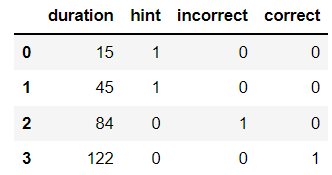

From here, we calculate the sum of these values since they correspond to just one question

In [7]:
import pandas as pd
import numpy as np
studentResponseData = pd.DataFrame({"duration": [15, 45, 84, 122], "hint": [1, 1, 0, 0], "incorrect": [0, 0, 1, 0], "correct": [0, 0, 0, 1]})
hide_code()
pd.DataFrame(studentResponseData.sum()).swapaxes("index", "columns")

,duration,hint,incorrect,correct
0,266,2,1,1


And we compare these means to the overall dataset means for that specific question. For example, lets say this data came from question 7:

In [8]:
bounds = distributions.loc[distributions.index == 7]
hide_code()
bounds

,durationLower,hintLower,incorrectLower,durationUpper,hintUpper,incorrectUpper
problem_id,,,,,,
7,266.446968,4.718327,1.99772,522.125296,8.794116,4.312253


And comparing the student's data to the question distributions bounds, we see that we fall into the top row in the below image:

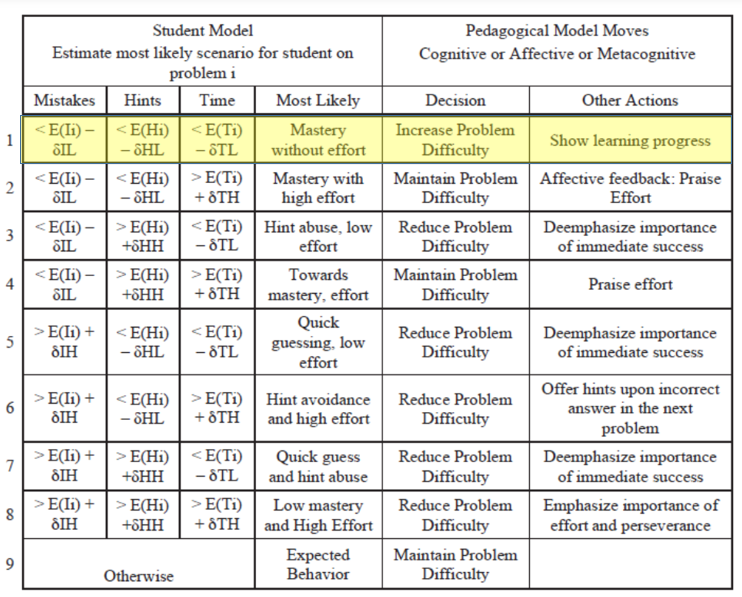

This process will continue and eventually reach an equilibrium, where the student is always in the zone of proximal development.

# What Worked Well
- Balance between Computer Science and Operations Research majors
- Work ethic of the group
- Well defined goals
- Our SPRINT deliverables estimates

# Difficulties
- Data set issues
- Contacting original authors
- Transitioning to python

# Issues With the Data
- No pictures available
- No hints available
- Multiple choice questions with no response options
- No good way to test our tutor
- Any more work on our model with this data set may inhibit our model's generalizability 
- Not all problem data fits a chi-sq distribution, some problem data is sparse

# Moving Forward
There are 3 main goals moving forward:
- Adjust parameters in our model for better performance.
- Simulate students for model validity approximations.
- Convert the questions in our data set to the actual Massachusetts math questions. 

# Success at the End of Next Semester
- A fully function model and GUI with coherent questions
- Generalizable to any question/hint/answer set
- Results showing our model works